In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [25]:
# Step 1: Generate or Load Weather Data
np.random.seed(42)  # For reproducibility
dates = pd.date_range(start="2023-01-01", periods=365)
temperatures = 30 + 10 * np.sin(np.linspace(0, 2 * np.pi, 365)) + np.random.normal(0, 2, 365)

data = pd.DataFrame({"Date": dates, "Temperature": temperatures})
data.to_csv("weather_data.csv", index=False)  # Save to CSV file
print("Dataset saved as 'weather_data.csv'.")

Dataset saved as 'weather_data.csv'.


In [26]:
# Step 2: Load the Dataset
df = pd.read_csv("weather_data.csv")
df["Date"] = pd.to_datetime(df["Date"])
df["Day"] = df["Date"].dt.dayofyear

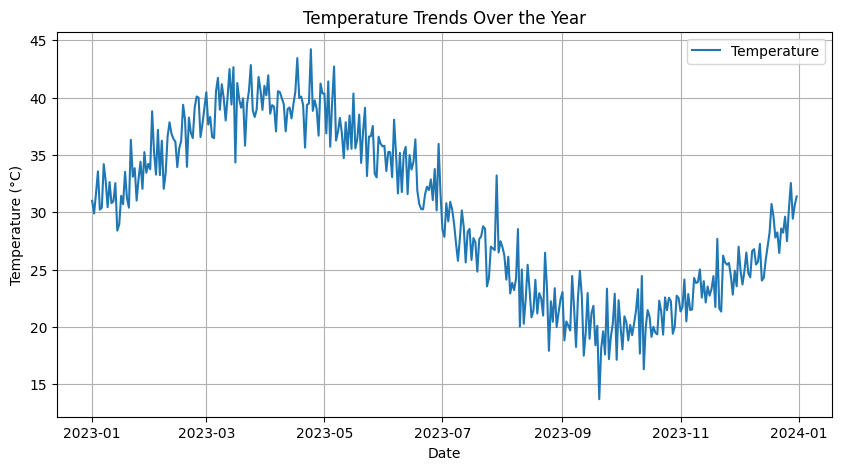

In [27]:
# Step 3: Visualize the Data
plt.figure(figsize=(10, 5))
plt.plot(df["Date"], df["Temperature"], label="Temperature")
plt.title("Temperature Trends Over the Year")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid()
plt.show()

In [30]:
# Step 4: Train-Test Split for Prediction
X = df["Day"].values.reshape(-1, 1)
y = df["Temperature"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Step 6: Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 24.32


In [32]:
# Step 5: Build and Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

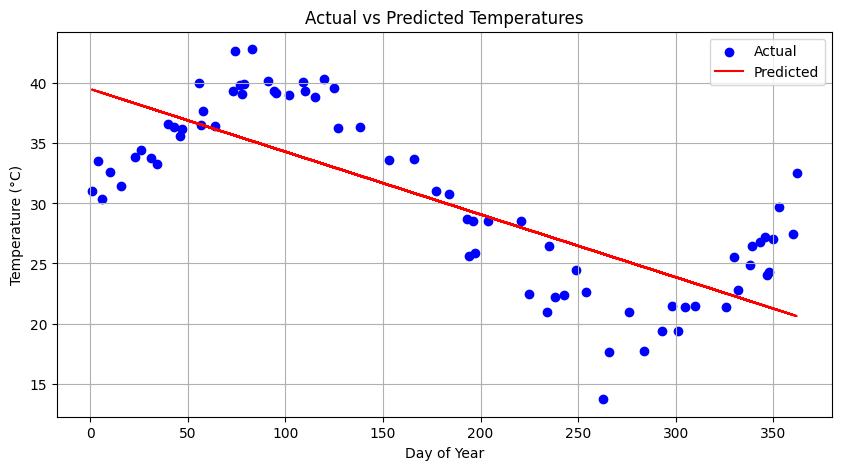

In [33]:
# Step 7: Visualize Predictions
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", label="Predicted")
plt.title("Actual vs Predicted Temperatures")
plt.xlabel("Day of Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid()
plt.show()

In [34]:
# Step 8: Predict Future Temperatures
future_days = np.arange(366, 396).reshape(-1, 1)  # Next 30 days
future_predictions = model.predict(future_days)

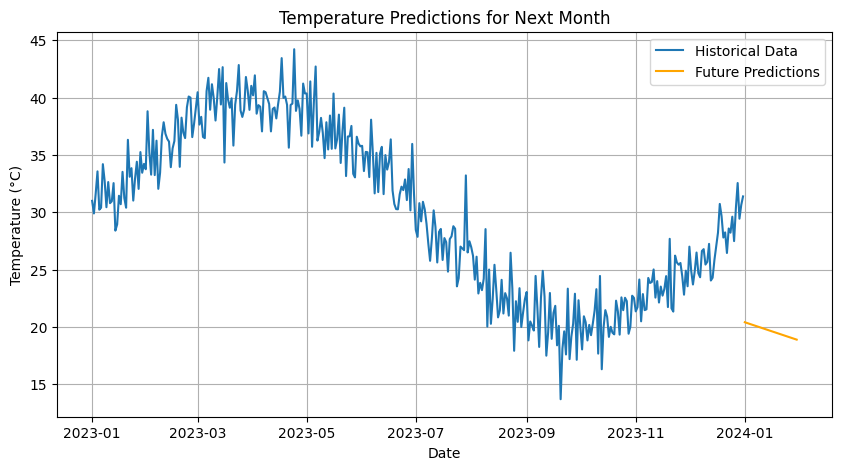

In [35]:
# Step 9: Visualize Future Predictions
plt.figure(figsize=(10, 5))
plt.plot(df["Date"], df["Temperature"], label="Historical Data")
future_dates = pd.date_range(start="2024-01-01", periods=30)
plt.plot(future_dates, future_predictions, label="Future Predictions", color="orange")
plt.title("Temperature Predictions for Next Month")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid()
plt.show()